<a href="https://colab.research.google.com/github/Alexhieuvuong/neural-network-project/blob/main/NN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import The Library

import os   
#The OS module in Python provides functions for interacting with the operating system     

import cv2
#cv2 is perform a program for loading an image in an unchanged, color, gray mode and display

import keras
# is an Open Source Neural Network library written in Python that runs on top of Theano or Tensorflow.

import random
#imports the random module, which contains a variety of things to do with random number generation

import numpy as np
#is a core library for Python's computer science

import pandas as pd
# a common library used in Data Science for storing structured data

import matplotlib.pyplot as plt
#is a collection of functions that make matplotlib work like MATLAB.

import tensorflow as tf

from tensorflow.keras.models import Sequential
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

from matplotlib import pyplot as plt
#pyplot is Matplotlib's plotting framework

import tensorflow.keras.layers as Layers 
#the basic building blocks of neural networks in Keras

from sklearn.utils import shuffle
# a useful method for shuffling two datasets in parallel

%matplotlib inline
# Displays output inline

In [ ]:
#import data from My Google Drive 
from google.colab import drive
DRIVE_ROOT = '/content/drive'
drive.mount(DRIVE_ROOT)

Mounted at /content/drive


In [ ]:
# Located the directory and assign the categories
DATASET_PATH = DRIVE_ROOT + '/MyDrive/archive'
CATEGORIES = ['buildings', 'forest', 'mountain', 'sea']

In [ ]:
def load_data(split, max_per_category=100_000):
  """Loads test or train datasets into numpy arrays."""
  path = DATASET_PATH + f'/seg_{split}/seg_{split}'
  X, y = [], []

  for category in CATEGORIES:
    subdirectory = os.path.join(path, category)
    label = CATEGORIES.index(category)
    print(f'Loading images from category "{category}"...')

    for counter, img in enumerate(os.listdir(subdirectory)):
      if counter >= max_per_category:
        break
      arr = cv2.imread(os.path.join(subdirectory, img), cv2.IMREAD_GRAYSCALE)
      X.append(cv2.resize(arr, (150, 150)))
      y.append(label)

  print(f'Loaded {len(X)} samples in total from {path}')
  # random shuffling of the training inputs and labels in the same way
  X, y = shuffle(X, y)
  X, y = np.array(X), np.array(y)
  X = X.reshape(-1, 150, 150, 1)
  print(f'Shape of input images: {X.shape}')
  return X, y

In [ ]:
# Load and normalize the training dataset
train_images, train_labels = load_data('train')
train_images = train_images / 255.0

Loading images from category "buildings"...
Loading images from category "forest"...
Loading images from category "mountain"...
Loading images from category "sea"...
Loaded 9258 samples in total from /content/drive/MyDrive/archive/seg_train/seg_train
Shape of input images: (9258, 150, 150, 1)


In [ ]:
# Import the test dataset (at most 230 per category == 10% test split)
test_images, test_labels = load_data('test', 230)
test_images = test_images / 255.0

Loading images from category "buildings"...
Loading images from category "forest"...
Loading images from category "mountain"...
Loading images from category "sea"...
Loaded 920 samples in total from /content/drive/MyDrive/archive/seg_test/seg_test
Shape of input images: (920, 150, 150, 1)


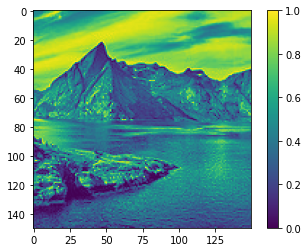

In [ ]:
# Let's look at one image as an example
plt.figure()
plt.imshow(train_images[0].reshape(150, 150))
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#A way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.

model = Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,1)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))

model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))

model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(len(CATEGORIES),activation='softmax'))

In [ ]:
# Compile defines the loss function, the optimizer and the metrics.
# accuracy = measure of how well a machine learning model generalizes to similar data.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     2000      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 180)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 180)       291780    
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 140)       226940    
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 100)       126100    
                                                        

In [ ]:
# don't forget to use a GPU accelerated runtime, otherwise the training takes ages
# we use early stopping to finish training if the validation loss does not decrease four times in a row
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, mode='min')
history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels), callbacks=[early_stopping])

Epoch 1/20
290/290 [==============================] - 181s 579ms/step - loss: 1.0739 - accuracy: 0.5001 - val_loss: 0.6161 - val_accuracy: 0.7641
Epoch 2/20
290/290 [==============================] - 158s 544ms/step - loss: 0.6906 - accuracy: 0.7254 - val_loss: 0.5139 - val_accuracy: 0.8000
Epoch 3/20
290/290 [==============================] - 158s 544ms/step - loss: 0.5496 - accuracy: 0.7984 - val_loss: 0.4151 - val_accuracy: 0.8413
Epoch 4/20
290/290 [==============================] - 158s 543ms/step - loss: 0.4588 - accuracy: 0.8395 - val_loss: 0.3864 - val_accuracy: 0.8489
Epoch 5/20
290/290 [==============================] - 157s 543ms/step - loss: 0.3983 - accuracy: 0.8640 - val_loss: 0.3430 - val_accuracy: 0.8587
Epoch 6/20
290/290 [==============================] - 158s 543ms/step - loss: 0.3434 - accuracy: 0.8846 - val_loss: 0.4965 - val_accuracy: 0.8326
Epoch 7/20
290/290 [==============================] - 157s 543ms/step - loss: 0.3210 - accuracy: 0.8947 - val_loss: 0.3006 -

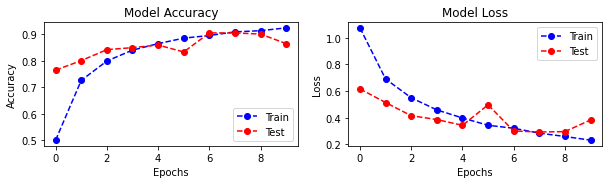

Best accuracy on test dataset: 90.4347836971283 %


In [ ]:
# Plot accuracy and loss over time
def plot_accuracy_loss(history):
    """Plot the accuracy and the loss during training."""
    fig = plt.figure(figsize=(10,5))

    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "Train")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "Test")
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "Train")
    plt.plot(history.history['val_loss'], 'ro--', label = "Test")
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(history)
print(f'Best accuracy on test dataset: {max(history.history["val_accuracy"]) * 100} %')

In [ ]:
#Define an image path value to add an image to a Field on a Form.
def image(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  new_arr = cv2.resize(img, (150, 150))
  new_arr = np.array(new_arr)
  new_arr = new_arr.reshape(-1, 150, 150, 1)
  return new_arr

def load_and_predict(img_path):
  im = cv2.imread(img_path)
  plt.imshow(im)
  plt.show()
  prediction = model.predict(image(img_path))
  print(f'Prediction: {CATEGORIES[prediction.argmax()]}')

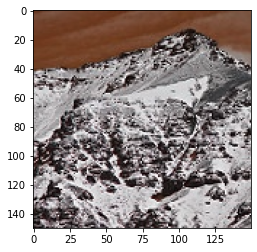

Prediction: mountain


In [ ]:
#Prediction Using Trained Model
load_and_predict('/content/drive/MyDrive/archive/seg_pred/seg_pred/13837.jpg')

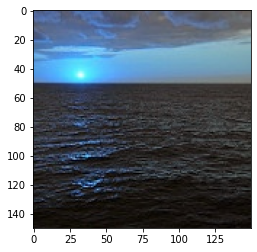

Prediction: sea


In [ ]:
#Prediction Using Trained Model
load_and_predict('/content/drive/MyDrive/archive/seg_pred/seg_pred/10038.jpg')

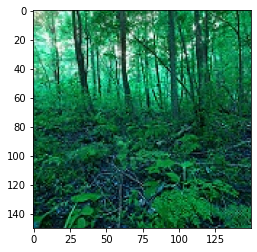

Prediction: forest


In [ ]:
#Prediction Using Trained Model
load_and_predict('/content/drive/MyDrive/archive/seg_pred/seg_pred/10060.jpg')

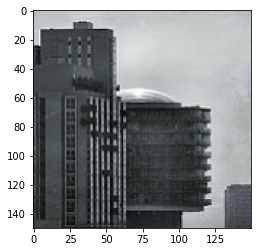

Prediction: buildings


In [ ]:
#Prediction Using Trained Model
load_and_predict('/content/drive/MyDrive/archive/seg_pred/seg_pred/10179.jpg')